In [ ]:
pip install pretrainedmodels

In [ ]:
pip install utils

In [ ]:
from torchvision.models import *
import pretrainedmodels

from fastai import *
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
import fastai

from utils import *
import sys
import torch
fastai.__version__

'1.0.61'

In [ ]:
from pathlib import Path

from fastai.callbacks.hooks import *

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
test =  pd.read_csv('53test.csv')

In [ ]:
test.head()

,Image,Class
0,image37.jpg,NaN
1,image40.jpg,NaN
2,image82.jpg,NaN
3,image145.jpg,NaN
4,image256.jpg,NaN


In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset.zip']), 'r')
data.extractall()

In [ ]:
path = 'dataset'
train_data_dir = 'dataset/Train Images'
test_data_dir = 'dataset/Test Images' 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('dataset/train.csv')

In [ ]:
test =  pd.read_csv('test.csv')

In [ ]:

df2 =df
df2['Class'] = df2['Class'].apply({'Attire':1,'Decorationandsignage':2,'Food':3,'misc':4}.get)
print(df2)

               Image  Class
0      image7042.jpg      3
1      image3327.jpg      4
2     image10335.jpg      1
3      image8019.jpg      3
4      image2128.jpg      1
...              ...    ...
5978   image2494.jpg      3
5979   image8015.jpg      1
5980   image4975.jpg      3
5981   image1222.jpg      3
5982   image9635.jpg      1

[5983 rows x 2 columns]


In [ ]:
from PIL import Image

In [ ]:
import numpy as np
train_images=np.array(df.iloc[:,0])
train_images

array(['image7042.jpg', 'image3327.jpg', 'image10335.jpg', 'image8019.jpg', ..., 'image8015.jpg', 'image4975.jpg',
       'image1222.jpg', 'image9635.jpg'], dtype=object)

In [ ]:
train_data_dir ='dataset/Train Images/'

In [ ]:
train_images=np.array(df2.iloc[:,0])
imagearr=[]
for i in train_images:
    img=Image.open(train_data_dir+i).convert('L')
    # L mode image, that means it is a single chaTableau for Data Visualization, Keras,nnel image - normally interpreted as greyscale. 
    img=img.resize((150,150),Image.ANTIALIAS)
    #PIL.Image.ANTIALIAS (a high-quality downsampling filter)
    imagearr.append(np.array(img))

(5983, 150, 150, 1)


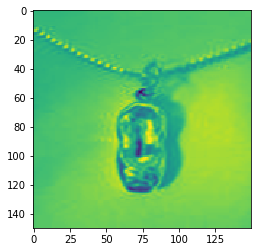

In [ ]:
import matplotlib.pyplot as plt

trainImages = np.array([i for i in imagearr]).reshape(-1,150, 150, 1)
print(trainImages.shape)
plt.imshow(np.asarray(imagearr)[4])

In [ ]:
img_dir='dataset/Test Images/'
test_images=np.array(test.iloc[:,0])
imagearr=[]
for i in test_images:
    img=Image.open(img_dir+i).convert('L')
    img=img.resize((150,150),Image.ANTIALIAS)
    imagearr.append(np.array(img))

In [ ]:
# np.asarray(imagearr)
testImages = np.array([i for i in imagearr]).reshape(-1,150,150, 1)
print(testImages.shape)

(68, 150, 150, 1)


In [ ]:
trainLabels = df2['Class'].values
from keras.utils import np_utils
trainLabels.shape
trainLabels = np_utils.to_categorical(trainLabels)

Using TensorFlow backend.


In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(150,150, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 146, 146, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 73, 73, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 34, 34, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(trainImages, trainLabels, batch_size = 100, epochs = 200, verbose = 1)

Epoch 1/100
5983/5983 [==============================] - 12s 2ms/step - loss: 1.3224 - acc: 0.4277
Epoch 2/100
5983/5983 [==============================] - 11s 2ms/step - loss: 1.1815 - acc: 0.4944
Epoch 3/100
5983/5983 [==============================] - 11s 2ms/step - loss: 1.1250 - acc: 0.5193
Epoch 4/100
5983/5983 [==============================] - 11s 2ms/step - loss: 1.0712 - acc: 0.5492
Epoch 5/100
5983/5983 [==============================] - 11s 2ms/step - loss: 1.0051 - acc: 0.5801
Epoch 6/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.9504 - acc: 0.6066
Epoch 7/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.8965 - acc: 0.6351
Epoch 8/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.8233 - acc: 0.6681
Epoch 9/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.7421 - acc: 0.7038
Epoch 10/100
5983/5983 [==============================] - 11s 2ms/step - loss: 0.6442 - acc: 0.7565
Epoch 11/

KeyboardInterrupt: ignored

In [ ]:
predictions = model.predict_classes(testImages)
predictions

array([3, 3, 3, 2, ..., 1, 1, 3, 3])

In [ ]:
test['Class']=predictions
test.head()

,Image,Class
0,image37.jpg,3
1,image40.jpg,3
2,image82.jpg,3
3,image145.jpg,2
4,image256.jpg,3


In [ ]:
test['Class'] = test['Class'].apply({1:'Attire',2:'Decorationandsignage',3:'Food',4:'misc'}.get)
print(test)

            Image                 Class
0     image37.jpg                  Food
1     image40.jpg                  Food
2     image82.jpg                  Food
3    image145.jpg  Decorationandsignage
4    image256.jpg                  Food
..            ...                   ...
63  image2479.jpg                Attire
64  image2690.jpg                Attire
65  image2719.jpg                Attire
66  image2736.jpg                  Food
67  image3575.jpg                  Food

[68 rows x 2 columns]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = test['Class']
y_true = true_test['Class']

In [ ]:
confusion_matrix(y_true, y_pred)

array([[14,  0,  5,  0],
       [ 7,  4,  5,  1],
       [ 3,  1, 12,  1],
       [ 3,  2,  5,  5]])

In [ ]:
accuracy_score(y_true, y_pred)

0.5147058823529411

In [ ]:
test['Class'].value_counts()

Food                    27
Attire                  27
misc                     7
Decorationandsignage     7
Name: Class, dtype: int64

In [ ]:
true_test['Class'].value_counts()

Attire                  19
Food                    17
Decorationandsignage    17
misc                    15
Name: Class, dtype: int64

Model Performance 

In [ ]:
Layers                                                     epochs                              kernel_size            Traing_Acc            Test_Acc

1 Input,2 hidden,1 fully                              100                                   5*5                         98*                    51*